# Human Resource Analytics
The primary goal here is to work towards the betterment of employees of a MNC and to make an employee friendly environment. Recently the organisation has started collecting data from employees about their satisfaction towards the company along with internal review of the employee performance. They are interested in the factor/s that affect the satisfaction of employees along with their increased productivity.

## 1. Problem Statement:
* Objective: To explore the HR data and provide relevant insights. By transforming these insights into practical strategies, the organisation can make significant strides in improving the working environment and productivity of employees.
* Problem statement: To reiterate, the organisation aims to optimise the environment and productivity of employees. To accomplish this goal, you need to understand extremes, patterns and associations with applications of probability and distributions.

## 2. Formalization of the Problem
In order to achieve this goal, we need to understand what success looks like in a clear and measurable way. Let's break down the main goals for the organisation entity using the questions provided.
* Understand the distributions and patterns within the HR data.
* Analyse the extremes within the data.
* Answering key questions related to probability and distributions of the data.

In our analysis, we'll look for insights into how these factors affect the organisation's success, as measured by identifying the patterns that could impact satisfaction and productivity of employees.

## 3. Data collection and processing
Link of the data: https://docs.google.com/spreadsheets/d/1kVgE55tJhOQh40eTv9LA2XLtqi5jueDmizhqbIunMDA/edit?usp=sharing
We downloaded the data in project folder with csv format and renamed in hr-data. Now make the dataframe.

### Import necessary libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Make dataframe and see the sample data

In [106]:
data = pd.read_csv('hr-data.csv')
data.head()

,EmployeeId,Hrs,Rating,EmployeeSatisfaction
0,E01,12.118051,Excellent,6
1,E02,13.298281,Excellent,8
2,E03,13.276334,Excellent,7
3,E04,10.798173,Excellent,9
4,E05,11.579172,Excellent,8


#### Let’s take a look into the Columns:

* 1. EmployeeId: Employee Id (this is system generated while collecting sample)
* 2. Hrs: Average number of hours an employee works per day in an organisation.
* 3. Rating: Rating provided by organisation to employees based on different factors, out of which Number of hours is one. There are 4 separate categories:
    * a. Outstanding - Best rating
    * b. Excellent - Second best rating
    * c. Satisfactory - Third best rating
    * d. Unsatisfactory - Least rating

* 4. EmployeeSatisfaction: The satisfaction score given by employees towards the organisation. This is a score out of 10. 



### Q1. How many observations are there in the dataset?

In [107]:
rows, cols = data.shape
print(f'There are {rows} observations in the dataset.')

There are 500 observations in the dataset.


### Q2. How many variables have missing values?

In [108]:
missing_cols = []

for col in data:
    if data[col].isnull().sum() > 0:
        missing_cols.append(col)
        
print(f"There are {len(missing_cols)} variable that have missing values.\n\
Name of the variable is '{missing_cols[0]}'")

There are 1 variable that have missing values.
Name of the variable is 'Hrs'


### Q3. How many missing values are present within the Hrs variable?

In [109]:
missing_hrs = data['Hrs'].isnull().sum()
print(f'Total missing values in Hrs variable is: {missing_hrs}')

Total missing values in Hrs variable is: 8


### Q4. What is the average value for the Hrs variable? Round it off to 2 decimal places.

In [110]:
avg_hrs = round(data.Hrs.mean(), 2)
print('Average value of Hrs variable is:', avg_hrs)

Average value of Hrs variable is: 11.31


### Q5. Is there any outliers in Hrs variable?

In [111]:
# Detect outliers with IQR method
q1 = data.Hrs.quantile(0.25)
q3 = data.Hrs.quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
print(f'Lower and upper bound is: {lower} and {upper}')
outliers = []

for hr in data.Hrs:
    if (hr < lower) | (hr > upper):
        outliers.append(hr)
        
if len(outliers) > 0:
    print('There are outliers in Hrs variable')
else: 
    print('There are no outliers in Hrs variable')
    
print(outliers)

Lower and upper bound is: 5.352980274375001 and 16.976678419375
There are outliers in Hrs variable
[120.398464, 1.377450075, 0.091720323]


### Q6. Choose the correct variable type for EmployeeSatisfaction.

In [112]:
print('EmployeeSatisfation variable is Discrete Quantitative Data Type.\n\n\
Reason: Discrete data consists of numerical values that are distinct and separate,\
and in this case, the satisfaction rating can only take on specific, whole number values\
within the range of 0 to 10. Each value represents a separate category or level of satisfaction,\
making it discrete rather than continuous.')

EmployeeSatisfation variable is Discrete Quantitative Data Type.

Reason: Discrete data consists of numerical values that are distinct and separate,and in this case, the satisfaction rating can only take on specific, whole number valueswithin the range of 0 to 10. Each value represents a separate category or level of satisfaction,making it discrete rather than continuous.


### Q7. What is the cardinality of the Rating variable in the dataset?

In [113]:
rating_cardinality = len(data.Rating.value_counts().index)
print(f'The cardinality of the Rating variable is: {rating_cardinality}')

The cardinality of the Rating variable is: 6


### Q8. Choose the correct variable type for hours Ratings.


In [114]:
print('Ratings is Ordinal Categorical Data\n\n\
Reason: Ordinal categorical variables represent categories with a natural order \
or ranking, and "Excellent" is likely one such category within a rating scale that \
may include other categories like "Good," "Fair," etc. These categories have an inherent order, \
suggesting that "Excellent" is higher than other possible ratings.')

Ratings is Ordinal Categorical Data

Reason: Ordinal categorical variables represent categories with a natural order or ranking, and "Excellent" is likely one such category within a rating scale that may include other categories like "Good," "Fair," etc. These categories have an inherent order, suggesting that "Excellent" is higher than other possible ratings.


## Data Cleaning

Cleaning our data in these ways will make sure that our analysis is based on accurate, consistent, and reliable information. This helps us get the best results and make the right decisions. Remember, having clean data is essential for a successful data analysis project!

Here are some data cleaning tasks for the given dataset. Please perform the following:

### Standardise the Rating column: Make the column consistent so that it has cardinality of 4. 
[Hint: Use Unsatisfactory in place of Un satisfactory and Satisfactory in place of satisfactory]

In [115]:
unique_before = data.Rating.unique()
cardinality_before = data.Rating.nunique()

# Print result before perform Standardise
print('Cardinality of Rating column before perform Standardise is:', cardinality_before)
print(f'Unique values of rating before perform Standardise:\n{unique_before}')

# Standardise Rating column
data['Rating'] = data.Rating.replace({'Un satisfactory': 'Unsatisfactory', 'satisfactory': 'Satisfactory'})

unique_after = data.Rating.unique()
cardinality_after = data.Rating.nunique()

# Print result before perform Standardise
print('\nCardinality of Rating column after perform Standardise is:', cardinality_after)
print(f'Unique values of rating after perform Standardise:\n{unique_after}')

Cardinality of Rating column before perform Standardise is: 6
Unique values of rating before perform Standardise:
['Excellent' 'Outstanding' 'Unsatisfactory' 'satisfactory' 'Satisfactory'
 'Un satisfactory']

Cardinality of Rating column after perform Standardise is: 4
Unique values of rating after perform Standardise:
['Excellent' 'Outstanding' 'Unsatisfactory' 'Satisfactory']


### Remove any empty or incomplete rows: 
Check if there are any rows with missing data. Substitute these values with the mean of numerical or mode for non-numerical data. [Challenge yourself: Try to fill mean/mode value corresponding to individual individual ratings]

In [116]:
# Print data info before perform
print(f'Data information before perform:\n')
print(data.info())

# Total outliers in Hrs column
null_before = data.Hrs.isnull().sum()

print('\nTotal null values in Hrs column before perform:', null_before)
print('\n-----------------------------------------\n')

# Fill null with mean of Hrs
data['Hrs'] = data.Hrs.fillna(data.Hrs.mean())

# Print data info after perform
print(f'Data information after perform:\n')
print(data.info())

# Total outliers in Hrs column
null_after = data.Hrs.isnull().sum()

print('\nTotal null values in Hrs column before perform:', null_after)

Data information before perform:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeId            500 non-null    object 
 1   Hrs                   492 non-null    float64
 2   Rating                500 non-null    object 
 3   EmployeeSatisfaction  500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB
None

Total null values in Hrs column before perform: 8

-----------------------------------------

Data information after perform:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeId            500 non-null    object 
 1   Hrs                   500 non-null    float64
 2   Rating                500 non-null    object 
 

## 4. Data Analysis
### Part 1) Understanding the distributions and patterns within the HR data.
One of the primary objectives here is to understand the distributions and patterns within the data. We want to understand why an employee has a satisfactory or unsatisfactory performance as compared to excellent/outstanding performance. This helps in understanding the employee performance within the company and the factors that contribute towards it.

### Q1. Calculate the mode of the employee performance in the rating column. Choose the correct option.

In [122]:
rating_mode = data.Rating.mode()[0]
print('Mode value of Rating is:', rating_mode)

Mode value of Rating is: Excellent


### Q2. Calculate the range of hours the employee is working for in case of unsatisfactory rating.




In [130]:
unsatisfactory_data = data[data.Rating == 'Unsatisfactory']
hrs_min = unsatisfactory_data.Hrs.min()
hrs_max = unsatisfactory_data.Hrs.max()
print(f'Range of Hours the employee working for:\n\
min: {hrs_min}\nmax: {hrs_max}')

Range of Hours the employee working for:
min: 0.091720323
max: 8.489765491


These stats help us in understanding the different rating factors closely.  We are able to understand that satisfactory and unsatisfactory performances have quite a say in their ratings. Lower ratings are given to employees who are working for lesser hours.

### Q3. Check out the distribution of the Hrs variable using histogram and boxplot. Where do we have the outliers?

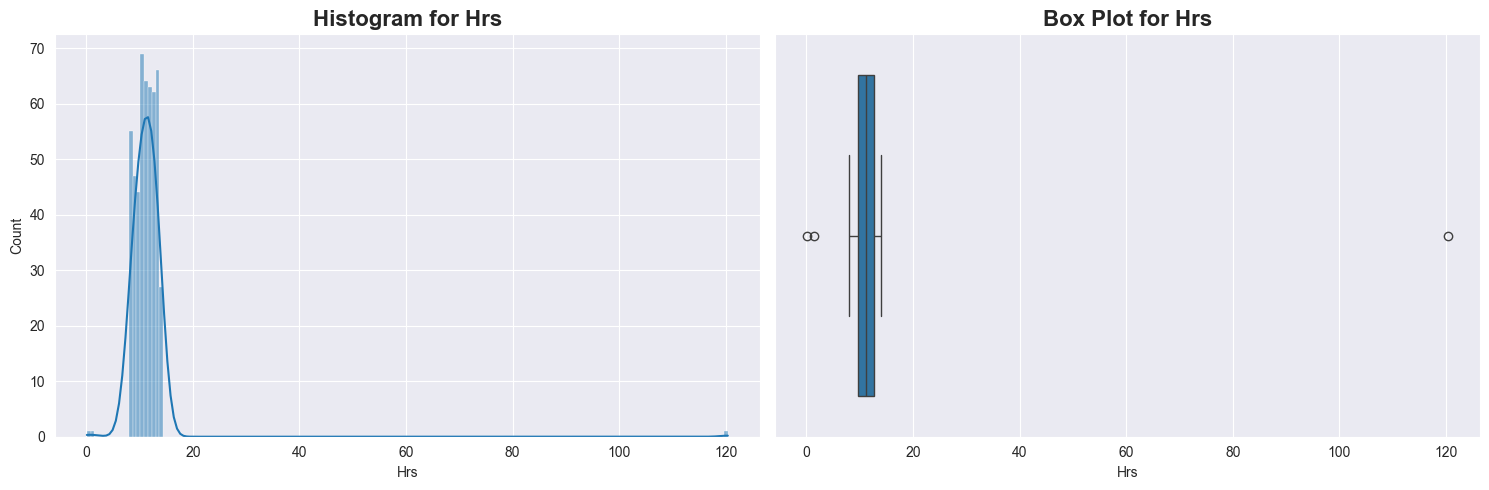

Outliers is in both higher and lower sides


In [146]:
# Create 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Create histogram for Hrs
sns.set_style('darkgrid')
sns.histplot(data=data, x='Hrs', kde=True, ax=axs[0])
axs[0].set_title('Histogram for Hrs', fontsize=16, fontweight='bold')

# Barplot for Hrs
sns.boxplot(data=data, x='Hrs', ax=axs[1])
axs[1].set_title('Box Plot for Hrs', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print('Outliers is in both higher and lower sides')

If you closely take a look in these distribution charts, you can clearly see that the majority of the Hours are centred around 8 to 14 which clearly indicates the outliers towards the higher and lower side..

A histogram will give you a peek into how your distribution looks like. You can define the number of peaks which means it can be a unimodal, bimodal or multimodal distribution depending on the peaks involved.

A box plot on the other hand helps you understand min, max and interquartile range where most of the data is centred around.

With these 2 charts, you can easily understand the extremes involved in the data. Do understand that extremes/outliers require some thoughtful investigation before we actually take the decision of removing/retaining them.
### Q4. Choose the correct histogram and boxplot for the Hrs variable.

In [147]:
print('As the above picture')

As the above picture


### Q5. Choose the correct frequency plot for Rating.

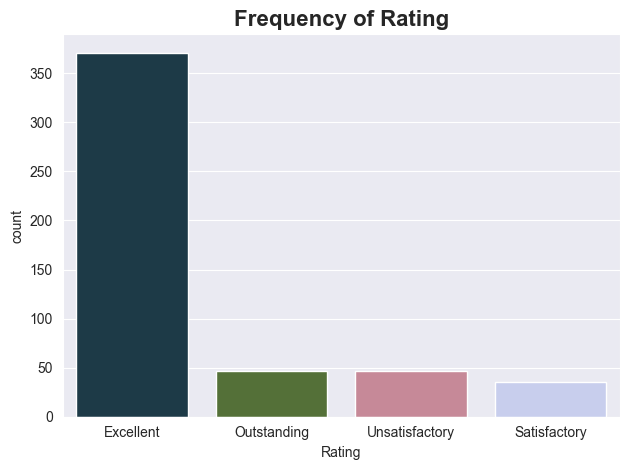

In [153]:
sns.countplot(data=data, x=data.Rating, hue=data.Rating, palette='cubehelix')
plt.title('Frequency of Rating', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

We can clearly see that the highest frequency is for Excellent rating followed by outstanding and unsatisfactory. Also, we can see that the majority of employees are giving 6 or 7 satisfaction scores which means that the majority of employees aren’t that happy due to lower work life balance. Therefore, our major focus should be towards increasing the work life balance of the employees rather than rewarding the higher number of work hours from the employees.

### Q6. Choose the correct frequencies for Employee Satisfaction Score.




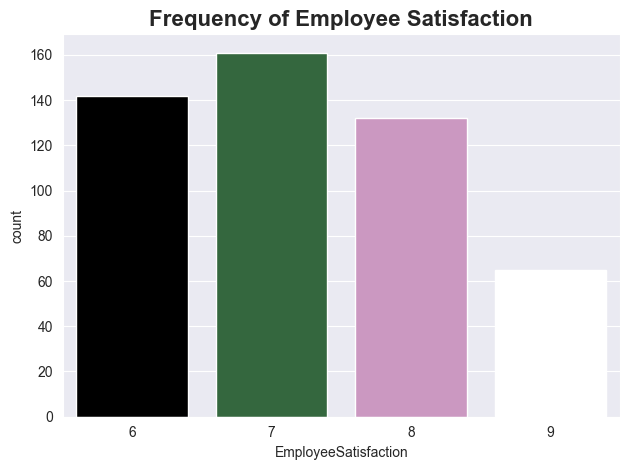

EmployeeSatisfaction
7    161
6    142
8    132
9     65
Name: count, dtype: int64

In [165]:
frequency = data.EmployeeSatisfaction.value_counts()
frequency

# Plot
sns.countplot(data=data, x=data.EmployeeSatisfaction, 
              hue=data.EmployeeSatisfaction, 
              palette='cubehelix', legend=False)
plt.title('Frequency of Employee Satisfaction', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

frequency = data.EmployeeSatisfaction.value_counts()
frequency

### Q7. Which rating has the highest number of average working hours?

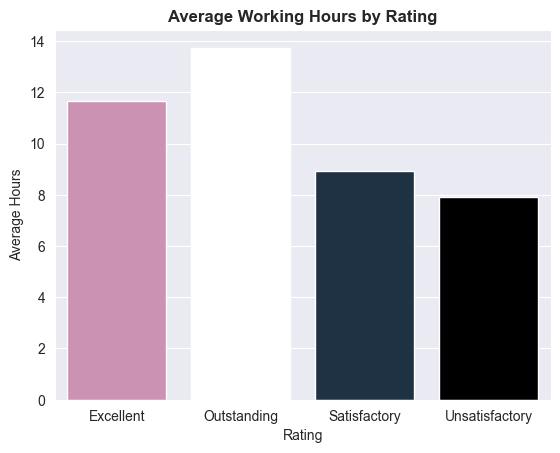

Rating with highest number of average working hours is: Outstanding


In [204]:
rating_group = data.groupby('Rating')['Hrs'].mean()
sns.barplot(x=rating_group.index, y=rating_group.values, hue=rating_group.values, palette='cubehelix', legend=False)
plt.xlabel('Rating')
plt.ylabel('Average Hours')
plt.title('Average Working Hours by Rating', fontweight='bold')
plt.show()

print('Rating with highest number of average working hours is:', rating_group.idxmax())

## Part 2) Identifying and excluding the outliers!
### Q8.1. Identify the correct upper and lower cut off within Hrs using IQR rule to exclude the outliers. Round off to 2 decimal places.

In [208]:
q1 = data.Hrs.quantile(0.25)
q3 = data.Hrs.quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

print('Upper cut of of Hrs is:', round(upper, 2))
print('Lower cut of of Hrs is:', round(lower, 2))

Upper cut of of Hrs is: 16.89
Lower cut of of Hrs is: 5.48


### Q8.2. After treatment with the outliers, what’s the mean value for Hrs variable?

In [228]:
# Outlier treatment
data['Hrs'] = np.clip(data['Hrs'], a_min=lower, a_max=upper)

# Mean after treatment
hrs_mean = round(data.Hrs.mean(), 2)

print('Mean of Hrs after treatmen is:', hrs_mean)

Mean of Hrs after treatmen is: 11.12


### Q8.3. After treatment of outliers, which rating isn’t witnessing changes with respect to Hrs variable?

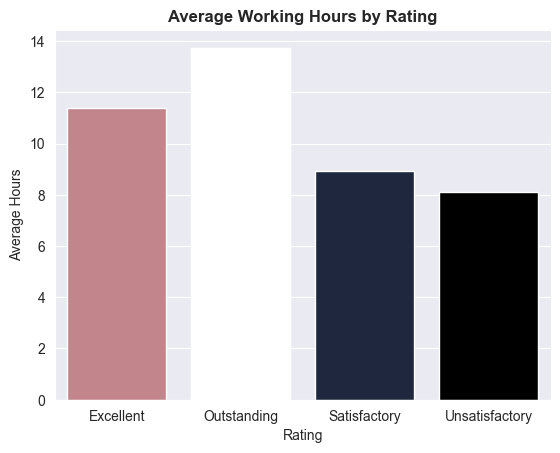

Rating with highest number of average working hours is: Outstanding


In [226]:
rating_group = data.groupby('Rating')['Hrs'].mean()
sns.barplot(x=rating_group.index, y=rating_group.values, hue=rating_group.values, palette='cubehelix', legend=False)
plt.xlabel('Rating')
plt.ylabel('Average Hours')
plt.title('Average Working Hours by Rating', fontweight='bold')
plt.show()

print('Rating with highest number of average working hours is:', rating_group.idxmax())

Identifying the cut off values in order to deal with outliers are a great way to restrict the data. Now, it depends on the domain/context of the problem that we want to restrict the data to these cut off values or not.
Do understand that these congestion rates are part of a realistic scenario and not because of some error in the data. Therefore, it's better to continue with the analysis as such.

## Part 3) Understanding probability distributions and Confidence interval
In our current problem, we have been given a sample of 500 employees. Let’s understand our Rating and Hour variable more closely by understanding their probability distributions and estimate their confidence intervals.

### Q9. Let’s first try to understand the Rating variable. Please identify the probabilities for each rating within the dataset.
[Hint: Use value_counts]

In [241]:
rating_counts = data['Rating'].value_counts()

# Calculate total number of ratings
total_ratings = len(data['Rating'])

# Calculate probabilities for each rating
rating_probabilities = rating_counts / total_ratings

# Print the probabilities for each rating
print("Probabilities for each rating:")
print(rating_probabilities*100)

Probabilities for each rating:
Rating
Excellent         74.2
Outstanding        9.4
Unsatisfactory     9.4
Satisfactory       7.0
Name: count, dtype: float64


### Q10. Now considering the probabilities calculated in previous questions, Please calculate the probability that 2 out of a sample of 10 employees are rated as outstanding. 
Round it off to 2 decimal places. [Hint: Use binomial distribution]



In [242]:
from scipy.stats import binom

# Probability of an employee being rated as outstanding
p = rating_probabilities.get('Outstanding', 0)  # Get probability of Outstanding rating, default to 0 if not found

# Total number of employees in the sample
n = 10

# Number of outstanding ratings
k = 2

# Calculate the probability using the binomial distribution PMF
probability = binom.pmf(k, n, p)

# Round off the probability to 2 decimal places
probability_rounded = round(probability, 2)

# Print the calculated probability
print("Probability that 2 out of 10 employees are rated as outstanding:", probability_rounded)


Probability that 2 out of 10 employees are rated as outstanding: 0.18


### Q11.1. Please calculate the probability that at least 3 out of a sample of 10 employees are rated as outstanding. 
Round it off to 2 decimal places.

In [244]:
p = rating_probabilities.get('Outstanding', 0)  # Get probability of Outstanding rating, default to 0 if not found

# Total number of employees in the sample
n = 10

# Number of outstanding ratings
k_min = 3

# Calculate the probability using the binomial distribution CDF
probability = 1 - binom.cdf(k_min - 1, n, p)

# Round off the probability to 2 decimal places
probability_rounded = round(probability, 2)

# Print the calculated probability
print("Probability that at least 3 out of 10 employees are rated as outstanding:", probability_rounded)

Probability that at least 3 out of 10 employees are rated as outstanding: 0.06


### Q11.2. Please calculate the probability that at least 7 out of a sample of 10 employees are rated as outstanding or Excellent. Round it off to 2 decimal places. 
[Hint: Add up the probability of both the ratings]
** The question is wrong. question should exact 7 out of 10 samples

In [268]:
p_outstanding = rating_probabilities.get('Outstanding')
p_excellent = rating_probabilities.get('Excellent') 
p = p_outstanding + p_excellent
n = 10
k = 7

prob = round(binom.pmf(k, n, p), 2)
print("Probability of exact 7 out of 10 employees are rated as outstanding or Excellent:", prob)


Probability of exact 7 out of 10 employees are rated as outstanding or Excellent: 0.15


### Q11.3. Please calculate the probability that None of the trainees are rated as Unsatisfactory. Round it off to 2 decimal places.

In [298]:
p = rating_probabilities.get('Unsatisfactory')

n = 10
k = 0
# Round off the probability to 2 decimal places
prob = round(binom.pmf(k, n, p), 2)

# Print the calculated probability
print("Probability that none of the trainees are rated as Unsatisfactory:", prob)

Probability that none of the trainees are rated as Unsatisfactory: 0.37


#####  By analysing these individual probabilities, we can understand that out of a randomly selected cohort of employees, what are the chances of occurrence of employees from these ratings. These kinds of probabilities help greatly if we have to randomly allocate the resources in a project for team building.

### Q12. Let’s first try to understand the Hrs variable. Assuming that this variable follows close to normal distribution, what’s the probability that an employee will provide less than 9 hrs of service? 
Round it off to 2 decimal places. [Hint: Use mean and SD for Hrs variable after outlier removal]

In [299]:
from scipy.stats import norm

# Calculate the mean and standard deviation of the Hrs variable after outlier removal
mean_hours = data['Hrs'].mean()
std_hours = data['Hrs'].std()

# Calculate the probability of an employee providing less than 9 hours of service using the CDF of the normal distribution
probability_less_than_9_hours = norm.cdf(9, loc=mean_hours, scale=std_hours)

# Round off the probability to 2 decimal places
probability_rounded = round(probability_less_than_9_hours, 2)

# Print the calculated probability
print("Probability that an employee will provide less than 9 hrs of service:", probability_rounded)


Probability that an employee will provide less than 9 hrs of service: 0.12


### Q13. What’s the probability that an employee will provide hours of service between 11 to 14? 
Round it off to 2 decimal places.

In [300]:
# Calculate the probability of hours of service less than or equal to 14 hours
probability_less_than_or_equal_to_14_hours = norm.cdf(14, loc=mean_hours, scale=std_hours)

# Calculate the probability of hours of service less than or equal to 11 hours
probability_less_than_or_equal_to_11_hours = norm.cdf(11, loc=mean_hours, scale=std_hours)

# Calculate the probability of hours of service between 11 and 14 hours
probability_between_11_and_14_hours = probability_less_than_or_equal_to_14_hours - probability_less_than_or_equal_to_11_hours

# Round off the probability to 2 decimal places
probability_rounded = round(probability_between_11_and_14_hours, 2)

# Print the calculated probability
print("Probability that an employee will provide hours of service between 11 to 14:", probability_rounded)

Probability that an employee will provide hours of service between 11 to 14: 0.47


### Q14. Calculate the 95% Confidence interval for the average of Hrs variable.

In [305]:
import scipy.stats as stats

# Determine the sample size
n = len(data['Hrs'])

# Find the critical value for a 95% confidence level and n-1 degrees of freedom
t_critical = stats.t.ppf(0.975, df=n-1)  # 0.975 corresponds to (1 - 0.05/2)

# Calculate the margin of error
margin_of_error = t_critical * (std_hours / (n ** 0.5))

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_hours - margin_of_error
upper_bound = mean_hours + margin_of_error

# Print the confidence interval
print("95% Confidence Interval for the average of Hrs variable:", (lower_bound, upper_bound))

95% Confidence Interval for the average of Hrs variable: (10.96583433074658, 11.278051950183594)


##### Hrs variable is an important factor as established in our previous sections as well. The continuous distribution prospective enlightens us to understand the ranges of probabilities. 

As we can see, higher number of hours have higher chances of occurrence rather than lower ones. The 95% CI of average Hrs also supports this theory. This automatically promotes dissatisfaction among the employees unless we are compensating it by salaries, overtime or excellent perks.


## Step 5) Presentation of results and Step 6) Provide Recommendations

* 1. High Working Hours: Throughout the analysis, we have witnessed that the organisation somehow rewards the employees working for a high number of hours within the organisation. This could actually be counterproductive as the employees tend to slow and sluggish after a certain point. 

    * Here the recommendation that could be provided is estimating the hours of service that will be needed in a project beforehand for proper allocation of manpower. Higher working hours should be reserved for extreme deadlines or until and unless absolutely necessary.
* 2. Work life balance: In our analysis, we have also witnessed that the highest frequency is for Excellent rating where employees tend to provide a good amount of working hours in general. This management should focus on better work life balance which means these scales should be estimated based on individual performances and their impact on the project rather than on the number of hours of service provided. 